<a href="https://colab.research.google.com/github/erodriguezda/senales2025/blob/main/parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

#  **punto 1**

========= RESULTADOS DE LA DISTANCIA MEDIA =========
A = 2.0,  B = 1.5,  n = 3,  m = -3
w0 = 6.283 rad/s   ->   T0 = 1.000 s
d_num ≈ 0.500000   (resultado numérico por promedio temporal)
d_teo = 0.500000   (resultado teórico usando δ[n+m])


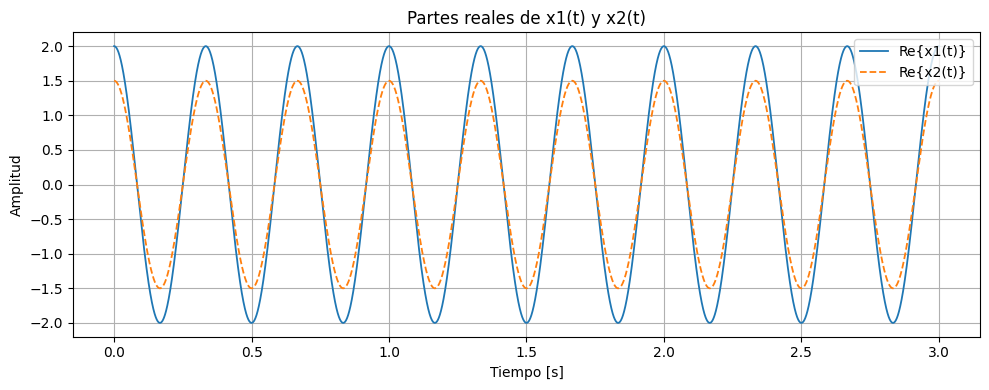

In [74]:

# ================================================================
#   Cálculo de la distancia media entre:
#        x1(t) = A·e^(-j·n·w0·t)
#        x2(t) = B·e^(+j·m·w0·t)
# ================================================================

# ------------------ PARÁMETROS INICIALES ------------------
A = 2.0        # Amplitud de x1(t)
B = 1.5        # Amplitud de x2(t)
n = 3          # Armónico de x1(t)
m = -3         # Armónico de x2(t) (usa m=2 si n+m ≠ 0)
w0 = 2*np.pi   # Frecuencia fundamental en rad/s

# ------------------ TIEMPO DE SIMULACIÓN ------------------
T0 = 2*np.pi / w0          # Periodo fundamental (1/f0)
fs = 5000                  # Frecuencia de muestreo (Hz)
periodos_total = 2000      # Número de periodos simulados para promediar
t_final = periodos_total * T0
t = np.arange(0, t_final, 1/fs)   # Vector de tiempo

# ------------------ DEFINICIÓN DE LAS SEÑALES ------------------
# Señal compleja x1(t) = A·e^(-j·n·w0·t)
x1 = A * np.exp(-1j * n * w0 * t)

# Señal compleja x2(t) = B·e^(+j·m·w0·t)
x2 = B * np.exp( 1j * m * w0 * t)

# ------------------ DISTANCIA MEDIA NUMÉRICA ------------------
# Se calcula la distancia promedio entre ambas señales:
# d² = promedio(|x1 - x2|²)
dist2_num = np.mean(np.abs(x1 - x2)**2)
dist_num = np.sqrt(dist2_num)

# ------------------ DISTANCIA MEDIA TEÓRICA ------------------
# Si n + m = 0, las frecuencias son conjugadas y δ[n+m] = 1; de lo contrario, δ = 0
delta = 1.0 if (n + m) == 0 else 0.0

# Fórmula teórica: d² = A² + B² - 2AB·δ[n+m]
dist2_teo = A**2 + B**2 - 2*A*B*delta
dist_teo = np.sqrt(dist2_teo)

# ------------------ IMPRESIÓN DE RESULTADOS ------------------
print("========= RESULTADOS DE LA DISTANCIA MEDIA =========")
print(f"A = {A},  B = {B},  n = {n},  m = {m}")
print(f"w0 = {w0:.3f} rad/s   ->   T0 = {T0:.3f} s")
print(f"d_num ≈ {dist_num:.6f}   (resultado numérico por promedio temporal)")
print(f"d_teo = {dist_teo:.6f}   (resultado teórico usando δ[n+m])")

# ------------------ VISUALIZACIÓN DE UN TRAMO ------------------
# Solo se grafican algunos periodos para comparar visualmente las señales
periodos_vis = 3
muestras_vis = int(periodos_vis * T0 * fs)

t_vis = t[:muestras_vis]          # tramo de tiempo a visualizar
x1_vis = np.real(x1[:muestras_vis])
x2_vis = np.real(x2[:muestras_vis])

plt.figure(figsize=(10, 4))
plt.plot(t_vis, x1_vis, label='Re{x1(t)}', linewidth=1.3)
plt.plot(t_vis, x2_vis, '--', label='Re{x2(t)}', linewidth=1.3)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Partes reales de x1(t) y x2(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **Punto_2**




=== CASO 1: fs = 5 kHz (con alias) ===
w1 = 0.200π,  w2 = 0.600π,  w3 = 2.200π  → alias = 0.200π
x[n] = 13·cos(0.2π·n) + 5·sin(0.6π·n)
Cuantización 4 bits: Δ = 2.40,  SQNR ≈ 20.38 dB


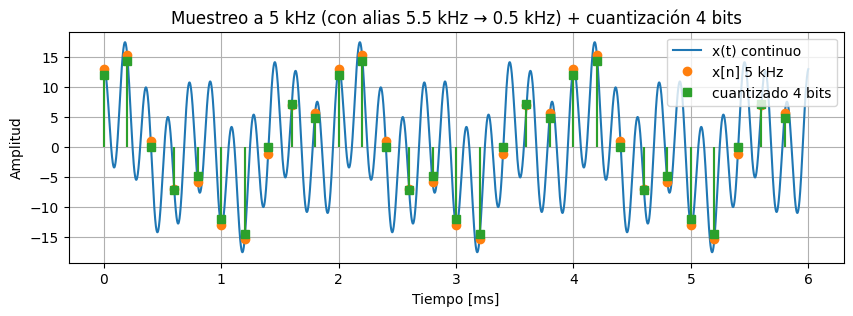


=== CASO 2: fs = 12 kHz (adecuado, sin alias) ===
w1 = 0.083π,  w2 = 0.250π,  w3 = 0.917π
x[n] = 3·cos(π/12·n) + 5·sin(π/4·n) + 10·cos(11π/12·n)


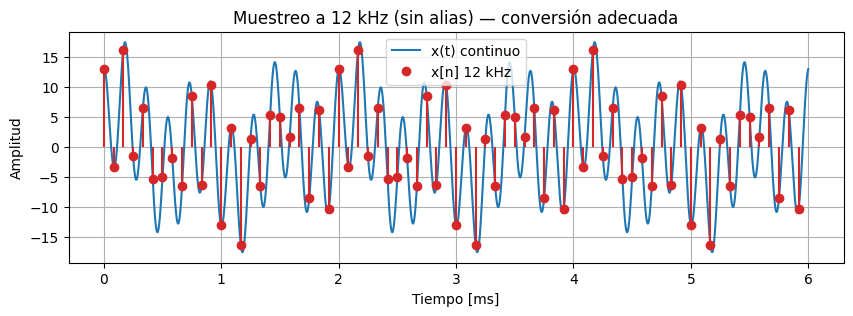

In [75]:
# ===============================================================
#  SIMULACIÓN DE MUESTREO Y CUANTIZACIÓN DE UNA SEÑAL ANALÓGICA
#  Señal: x(t) = 3·cos(1000πt) + 5·sin(3000πt) + 10·cos(11000πt)
#  Comparación entre fs = 5 kHz (con alias) y fs = 12 kHz (adecuado)
# ===============================================================


# Definición de constante matemática
π = np.pi    # alias visual para el número pi

# ---------------------------------------------------------------
#     1. Definición de la señal continua x(t)
# ---------------------------------------------------------------
def señal_continua(t):
    """Genera la señal analógica original."""
    return 3*np.cos(1000*π*t) + 5*np.sin(3000*π*t) + 10*np.cos(11000*π*t)

# Parámetros de simulación temporal
T0   = 1/500        # periodo fundamental de la señal compuesta
Tsim = 3*T0         # duración total de la simulación (3 periodos)
t_ct = np.linspace(0, Tsim, 4000)  # vector temporal continuo
x_ct_val = señal_continua(t_ct)    # valores de la señal continua

# ---------------------------------------------------------------
#     2. Funciones auxiliares: muestreo y cuantización
# ---------------------------------------------------------------
def muestreo(fs):
    """
    Muestrea la señal continua a una frecuencia dada (fs).
    Retorna: tiempos discretos y muestras x[n].
    """
    t_n = np.arange(0, Tsim, 1/fs)   # instantes de muestreo
    x_n = señal_continua(t_n)        # valores muestreados
    return t_n, x_n

def cuantizar_4bits(x, Vref=18.0):
    """
    Cuantiza la señal x usando 4 bits (16 niveles) con rango ±Vref.
    Retorna: señal cuantizada, paso Δ y relación señal/ruido (SQNR).
    """
    L = 16                     # niveles de cuantización
    Δ = 2*Vref / (L-1)         # paso entre niveles (mid-tread)
    k = np.round(x / Δ)        # redondeo al nivel más cercano
    k = np.clip(k, -(L-1)/2, (L-1)/2)  # limitar al rango permitido
    x_q = Δ * k                # reconstrucción de la señal cuantizada

    # Cálculo de ruido y potencia
    Nq = np.mean((x - x_q)**2) + 1e-18
    Ps = np.mean(x_q**2) + 1e-18
    SQNR = 10 * np.log10(Ps / Nq)
    return x_q, Δ, SQNR

def stem_modificado(x, y, color='C0', marcador='o', etiqueta=None):
    """Versión mejorada de stem() compatible con Colab."""
    barras, marcadores, base = plt.stem(x, y, linefmt=color+'-',
                                        markerfmt=color+marcador, basefmt=' ')
    if etiqueta:
        barras.set_label(etiqueta)
    return barras, marcadores, base

# ---------------------------------------------------------------
#     3. Caso 1: Frecuencia de muestreo fs = 5 kHz (con alias)
# ---------------------------------------------------------------
fs_1 = 5000
t1, x1 = muestreo(fs_1)

# Cálculo de frecuencias digitales (en radianes)
w1 = 2*π*500/fs_1
w2 = 2*π*1500/fs_1
w3 = 2*π*5500/fs_1

# Ajuste de aliasing (frecuencia que “refleja” sobre Nyquist)
w3_mod = w3 % (2*π)
w3_alias = 2*π - w3_mod if w3_mod > π else w3_mod

# Cuantización con 4 bits
x1_q, Δ1, SQNR1 = cuantizar_4bits(x1)

# Descripción analítica equivalente (solo para mostrar en pantalla)
expr_5k = "x[n] = 13·cos(0.2π·n) + 5·sin(0.6π·n)"

print("=== CASO 1: fs = 5 kHz (con alias) ===")
print(f"w1 = {w1/π:.3f}π,  w2 = {w2/π:.3f}π,  w3 = {w3/π:.3f}π  → alias = {w3_alias/π:.3f}π")
print(expr_5k)
print(f"Cuantización 4 bits: Δ = {Δ1:.2f},  SQNR ≈ {SQNR1:.2f} dB")

# Gráfica comparativa
plt.figure(figsize=(10,3))
plt.plot(t_ct*1e3, x_ct_val, label='x(t) continuo')
stem_modificado(t1*1e3, x1, 'C1', 'o', 'x[n] 5 kHz')
stem_modificado(t1*1e3, x1_q, 'C2', 's', 'cuantizado 4 bits')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Muestreo a 5 kHz (con alias 5.5 kHz → 0.5 kHz) + cuantización 4 bits')
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------------------------------------------
#     4. Caso 2: fs = 12 kHz (sin alias)
# ---------------------------------------------------------------
fs_2 = 12000
t2, x2 = muestreo(fs_2)

# Frecuencias digitales para fs=12 kHz
w1_2 = 2*π*500/fs_2       # π/12
w2_2 = 2*π*1500/fs_2      # π/4
w3_2 = 2*π*5500/fs_2      # 11π/12

# Expresión discreta equivalente
expr_12k = "x[n] = 3·cos(π/12·n) + 5·sin(π/4·n) + 10·cos(11π/12·n)"

print("\n=== CASO 2: fs = 12 kHz (adecuado, sin alias) ===")
print(f"w1 = {w1_2/π:.3f}π,  w2 = {w2_2/π:.3f}π,  w3 = {w3_2/π:.3f}π")
print(expr_12k)

# Gráfica comparativa
plt.figure(figsize=(10,3))
plt.plot(t_ct*1e3, x_ct_val, label='x(t) continuo')
stem_modificado(t2*1e3, x2, 'C3', 'o', 'x[n] 12 kHz')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Muestreo a 12 kHz (sin alias) — conversión adecuada')
plt.grid(True)
plt.legend()
plt.show()


# **Punto 4**

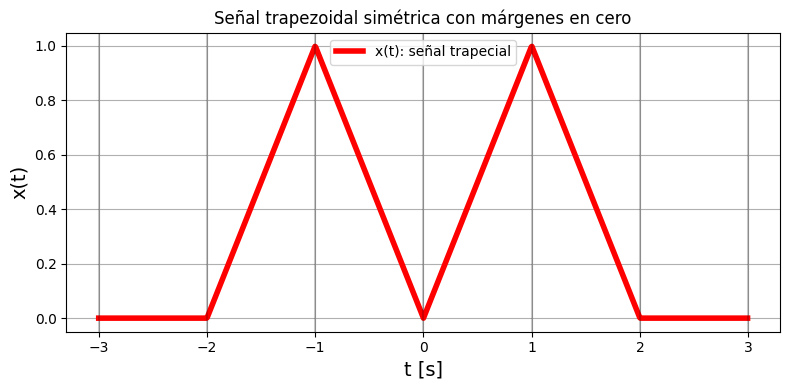

In [76]:
# --- Generación de una señal "M" con forma de trapecio y márgenes en cero ---
# El objetivo de este código es construir una señal periódica con un perfil
# que sube y baja linealmente, simulando un trapecio simétrico alrededor de t=0.

# ----------------------------
# Parámetros principales
# ----------------------------

A  = 1.0   # Altura máxima del trapecio (amplitud del pico)
d1 = 1.0   # Punto donde ocurre el cambio de pendiente ascendente/descendente
d2 = 2.0   # Límite del trapecio (después de este punto, la señal vale 0)

# El período T debe cumplir que T/2 > d2 para asegurar zonas en cero.
T = 6.0  # Ejemplo: 6 s ⇒ T/2 = 3 s > d2 = 2 s
assert (T/2) > d2, "Debes escoger T/2 > d2 para tener márgenes en 0."

# ----------------------------
# Definición temporal y muestreo
# ----------------------------

Fo = 1 / T               # Frecuencia fundamental (Hz)
Fs = 1000 * Fo           # Frecuencia de muestreo (mil veces mayor que Fo)
tv = np.arange(-T/2, T/2, 1/Fs)  # Vector de tiempo centrado en 0
Nm = len(tv)             # Número total de muestras

# Inicialización de la señal con ceros
x = np.zeros_like(tv)    # Comienza siendo todo 0 (márgenes fuera del trapecio)

# ----------------------------
# Construcción del trapecio
# ----------------------------

# Segmento 1: entre -d2 y -d1 la señal sube linealmente de 0 → A
m1 = (tv >= -d2) & (tv <= -d1)
x[m1] = A * (tv[m1] + d2) / (d2 - d1)

# Segmento 2: entre -d1 y 0 la señal baja de A → 0
m2 = (tv > -d1) & (tv <= 0)
x[m2] = A * (-tv[m2] / d1)

# Segmento 3: entre 0 y d1 la señal vuelve a subir 0 → A
m3 = (tv >= 0) & (tv <= d1)
x[m3] = A * (tv[m3] / d1)

# Segmento 4: entre d1 y d2 la señal baja nuevamente de A → 0
m4 = (tv >= d1) & (tv <= d2)
x[m4] = A * (d2 - tv[m4]) / (d2 - d1)

# Los márgenes [-T/2, -d2] y [d2, T/2] permanecen en 0 (ya están inicializados en ceros)

# ----------------------------
# Corrección de valores en puntos clave
# ----------------------------

# Asegura precisión en las transiciones (evita errores numéricos)
x[np.isclose(tv, -d2)] = 0.0   # inicio izquierdo del trapecio
x[np.isclose(tv,  d2)] = 0.0   # fin derecho del trapecio
x[np.isclose(tv,   0)] = 0.0   # punto central de simetría
x[np.isclose(tv, -d1)] = A     # pico izquierdo
x[np.isclose(tv,  d1)] = A     # pico derecho

# ----------------------------
# Gráfica de la señal
# ----------------------------

plt.figure(figsize=(8,4))             # Ajuste opcional del tamaño de la figura
plt.plot(tv, x, color='r', linewidth=4, label='x(t): señal trapecial')

# Líneas verticales de referencia en los puntos clave
for v in [-T/2, -d2, -d1, 0, d1, d2, T/2]:
    plt.axvline(v, color='k', alpha=0.2)

# Etiquetas y estilo de gráfico
plt.xlabel("t [s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.title("Señal trapezoidal simétrica con márgenes en cero")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [77]:
# ---------------------------------------------------------------
# Cálculo de los coeficientes Cn de la serie de Fourier compleja
# ---------------------------------------------------------------
# En este bloque se calculan los armónicos de la señal "x(t)" usando
# la definición integral:
#          Cn = (1/T) ∫ x(t) * e^(-j n w0 t) dt
# donde w0 = 2π/T es la frecuencia fundamental.

# ----------------------------
# Parámetros de la serie
# ----------------------------

N  = 5              # Número de armónicos considerados en cada lado (positivo y negativo)
wo = 2 * np.pi / T  # Frecuencia fundamental (rad/s)
dt = 1 / Fs         # Paso temporal usado para aproximar la integral numéricamente

# ----------------------------
# Construcción de las bases exponenciales e^{j n w0 t}
# ----------------------------
# Se genera una matriz con las funciones base φ_n(t) = e^{j n w0 t}
# para todos los valores de n dentro del rango [-N, N].
# Cada columna corresponde a un n distinto.

nv = np.arange(-N, N+1)                     # Vector con los índices n
phin = np.zeros((Nm, 2*N+1), np.complex128) # Matriz de bases complejas (Nm filas, 2N+1 columnas)

# Llenar la matriz 'phin' evaluando la exponencial compleja para cada n
for idx, n in enumerate(nv):
    phin[:, idx] = np.exp(1j * n * wo * tv)

# ----------------------------
# Cálculo de los coeficientes Cn
# ----------------------------
# Se aplica la definición de la Serie de Fourier compleja usando integración numérica.
# Se usa el método del trapecio (np.trapz) para aproximar la integral.

Cn = np.zeros(2*N + 1, np.complex128)  # Vector donde se guardarán los coeficientes Cn

for idx, n in enumerate(nv):
    # Producto punto entre x(t) y la base conjugada e^{-j n w0 t}
    integrando = x * np.exp(-1j * n * wo * tv)

    # Integral numérica (regla del trapecio)
    Cn[idx] = (1.0 / T) * np.trapz(integrando, tv)

# ----------------------------
# Verificación del término DC
# ----------------------------
# El coeficiente central (índice N) corresponde a n = 0 (componente de corriente continua).
# Ya fue calculado en el bucle anterior, por lo que no se requiere asignarlo manualmente.

# Cn[N] contiene el valor de C0 (nivel DC)


/tmp/ipython-input-1858999449.py:44: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Cn[idx] = (1.0 / T) * np.trapz(integrando, tv)


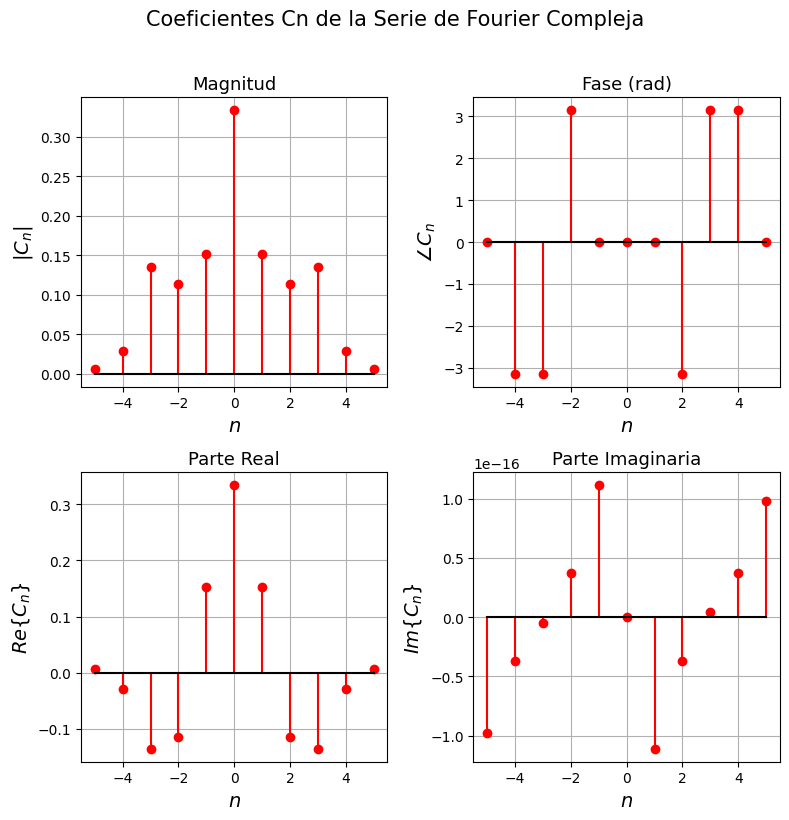

In [78]:
# ---------------------------------------------------------------
# Visualización de los coeficientes complejos Cn de la Serie de Fourier
# ---------------------------------------------------------------
# En este bloque se grafican las diferentes representaciones de los coeficientes:
# parte real, parte imaginaria, magnitud y fase.
# Cada subgráfico corresponde a una de estas características.

# Crear figura cuadrada (8x8 pulgadas)
fig = plt.figure(figsize=(8, 8))

# ----------------------------
# 1️⃣ Magnitud |Cn|
# ----------------------------
# Muestra el valor absoluto de cada coeficiente, indicando la importancia
# de cada armónico en la reconstrucción de la señal.
plt.subplot(2, 2, 1)
plt.stem(nv, np.abs(Cn), 'r', basefmt="k")  # Gráfico tipo "stem" (barras discretas)
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.title("Magnitud", fontsize=13)
plt.grid(True)

# ----------------------------
# 2️⃣ Fase ∠Cn
# ----------------------------
# Indica el desfase de cada componente armónica.
plt.subplot(2, 2, 2)
plt.stem(nv, np.angle(Cn), 'r', basefmt="k")
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\angle C_n$', fontsize=14)
plt.title("Fase (rad)", fontsize=13)
plt.grid(True)

# ----------------------------
# 3️⃣ Parte real Re{Cn}
# ----------------------------
# Representa la componente real de cada coeficiente complejo.
plt.subplot(2, 2, 3)
plt.stem(nv, np.real(Cn), 'r', basefmt="k")
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.title("Parte Real", fontsize=13)
plt.grid(True)

# ----------------------------
# 4️⃣ Parte imaginaria Im{Cn}
# ----------------------------
# Representa la componente imaginaria de los coeficientes.
plt.subplot(2, 2, 4)
plt.stem(nv, np.imag(Cn), 'r', basefmt="k")
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.title("Parte Imaginaria", fontsize=13)
plt.grid(True)

# ----------------------------
# Ajustes finales de la figura
# ----------------------------
fig.suptitle("Coeficientes Cn de la Serie de Fourier Compleja", fontsize=15, y=1.02)
fig.tight_layout()
plt.show()

In [79]:
# ---------------------------------------------------------------
# Cálculo de la potencia media de la señal x(t)
# ---------------------------------------------------------------
# La potencia promedio se define como:
#         Px = (1/T) ∫ |x(t)|² dt
# Este valor se usa luego para calcular el error relativo de reconstrucción.

Px = (1.0 / T) * np.trapz(np.abs(x)**2, tv)   # Integración numérica con regla del trapecio


# ---------------------------------------------------------------
# Función de prueba: pltest(Na)
# ---------------------------------------------------------------
# Esta función permite visualizar la reconstrucción de la señal x(t)
# usando un número limitado de armónicos a partir de los coeficientes Cn.
# También estima el error relativo entre la señal original y la reconstruida.

def pltest(Na=1):
    # -----------------------------------------------------------
    # Selección de armónicos
    # -----------------------------------------------------------
    # Se eligen los índices correspondientes a los armónicos que se usarán.
    # 'Na' indica cuántos armónicos a cada lado del término central se toman.
    ind = np.arange(N - Na, N + Na + 1)  # Vector de índices usados

    # -----------------------------------------------------------
    # Cálculo del error relativo usando el teorema de Parseval
    # -----------------------------------------------------------
    # Se compara la potencia contenida en los armónicos usados con la total Px.
    # El error relativo representa la energía no reconstruida.
    er = 1 - np.sum(np.abs(Cn[ind])**2) / Px

    # -----------------------------------------------------------
    # Reconstrucción de la señal con los armónicos seleccionados
    # -----------------------------------------------------------
    # Multiplicamos las bases φ_n(t) por sus coeficientes Cn y sumamos.
    xe = phin[:, ind].dot(Cn[ind])

    # -----------------------------------------------------------
    # Visualización: señal original vs reconstruida
    # -----------------------------------------------------------
    plt.figure(figsize=(8, 4))
    plt.plot(tv, xe, color='b', label='$x_e(t)$')   # señal estimada
    plt.plot(tv, x,  color='r', label='x(t)')       # señal original

    # Título incluye el error relativo expresado en porcentaje
    plt.title('$E_r$ = %.2f [%%]' % (100 * er), fontsize=16)

    # Etiquetas y estilo
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # No retorna ningún valor explícito (solo muestra el gráfico)
    return


/tmp/ipython-input-1896576981.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Px = (1.0 / T) * np.trapz(np.abs(x)**2, tv)   # Integración numérica con regla del trapecio


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


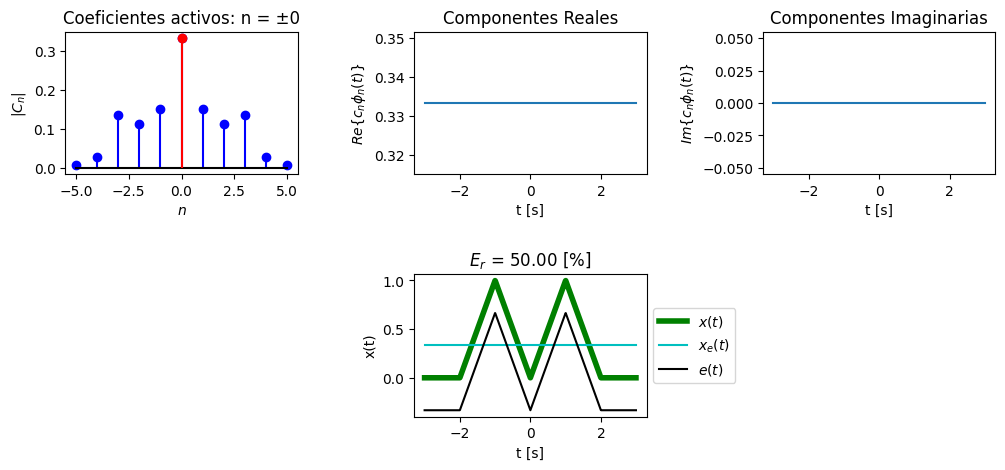

In [80]:
# ---------------------------------------------------------------
# Animación del proceso de reconstrucción de la señal mediante la Serie de Fourier
# ---------------------------------------------------------------
# Este bloque crea una animación que muestra cómo la señal x(t) se aproxima
# progresivamente a medida que se incluyen más armónicos (positivos y negativos).

from matplotlib import animation, rc
from IPython.display import HTML

# ---------------------------------------------------------------
# Configuración general de la figura
# ---------------------------------------------------------------
# Se crean 2 filas y 3 columnas de subgráficos (algunos se dejarán apagados).
fig, ax = plt.subplots(2, 3, figsize=(12, 5))


# ---------------------------------------------------------------
# Función de actualización (llamada por la animación en cada cuadro)
# ---------------------------------------------------------------
# Esta función se ejecuta en cada frame del GIF, actualizando los subplots
# para mostrar la evolución de la reconstrucción conforme crecen los armónicos.
def update(n):
    # -----------------------------------------------------------
    # Limpieza de todos los subgráficos antes de redibujar
    # -----------------------------------------------------------
    for i in range(2):
        for j in range(3):
            ax[i, j].clear()

    # -----------------------------------------------------------
    # Selección de los armónicos utilizados en este cuadro
    # -----------------------------------------------------------
    ind = np.arange(N - n, N + n + 1)   # Índices de armónicos activos

    # -----------------------------------------------------------
    # Subgráfico 1 (arriba izquierda): Espectro de magnitud |Cn|
    # -----------------------------------------------------------
    # En azul: todos los coeficientes, en rojo: los usados en la reconstrucción actual.
    ax[0, 0].stem(nv, np.abs(Cn), 'b', basefmt="k")
    ax[0, 0].stem(nv[ind], np.abs(Cn[ind]), 'r', basefmt="k")
    ax[0, 0].set_xlabel(r'$n$')
    ax[0, 0].set_ylabel(r'$|C_n|$')
    ax[0, 0].set_title("Coeficientes activos: n = ±%d" % n)

    # -----------------------------------------------------------
    # Subgráficos 2 y 3 (arriba centro y derecha): componentes espectrales
    # -----------------------------------------------------------
    # Se muestran las partes reales e imaginarias de cₙ·φₙ(t)
    ce = phin[:, ind].dot(np.diag(Cn[ind]))   # matriz de componentes individuales

    ax[0, 1].plot(tv, np.real(ce))
    ax[0, 1].set_xlabel('t [s]')
    ax[0, 1].set_ylabel('$Re\\{c_n\\phi_n(t)\\}$')
    ax[0, 1].set_title("Componentes Reales")

    ax[0, 2].plot(tv, np.imag(ce))
    ax[0, 2].set_xlabel('t [s]')
    ax[0, 2].set_ylabel('$Im\\{c_n\\phi_n(t)\\}$')
    ax[0, 2].set_title("Componentes Imaginarias")

    # -----------------------------------------------------------
    # Subgráfico central inferior (1,1): reconstrucción de la señal
    # -----------------------------------------------------------
    # Aquí se comparan la señal original, la reconstruida y el error.
    xe = phin[:, ind].dot(Cn[ind])      # señal reconstruida
    et = x - xe                         # error instantáneo
    er = 1 - np.sum(np.abs(Cn[ind])**2) / Px   # error relativo (Parseval)

    ax[1, 1].plot(tv, x,  'g', linewidth=4, label='$x(t)$')   # señal original
    ax[1, 1].plot(tv, xe, 'c', label='$x_e(t)$')              # reconstrucción
    ax[1, 1].plot(tv, et, 'k', label='$e(t)$')                # error temporal
    ax[1, 1].set_title('$E_r$ = %.2f [%%]' % (100 * er))
    ax[1, 1].set_xlabel('t [s]')
    ax[1, 1].set_ylabel('x(t)')
    ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # -----------------------------------------------------------
    # Los subplots de las esquinas inferiores se desactivan
    # -----------------------------------------------------------
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')

    # -----------------------------------------------------------
    # Ajuste de espacios entre subgráficos
    # -----------------------------------------------------------
    plt.subplots_adjust(wspace=0.5, hspace=0.7)


# ---------------------------------------------------------------
# Creación y visualización de la animación
# ---------------------------------------------------------------
# frames = cantidad de cuadros (0 a N)
# blit=False permite redibujar todos los ejes en cada frame.
anim = animation.FuncAnimation(
    fig,
    update,
    frames=np.arange(0, N + 1, 1),
    blit=False
)

# Mostrar la animación directamente en el entorno de Jupyter (HTML embebido)
rc('animation', html='jshtml')
anim
